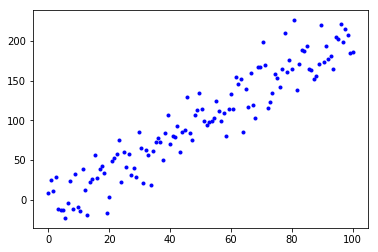

In [26]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
#import visuals as vs
import dataset_utils as utils
import random as rdm

def dataSetFunction(x):
    return 2*x + 1*np.random.normal(scale = 20)        

df = utils.createDataset(0, 100, 0.8, dataSetFunction )  


features = df["x"]
values = df["y"]

plt.scatter(features, values, color="#0000ff", marker='.')  
plt.show() 



In [13]:
# Performance metrics
from sklearn.metrics import fbeta_score, make_scorer
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    import sklearn.metrics as metrics
    score = metrics.r2_score(y_true, y_predict)
    # Return the score
    return score

### Fitting the model

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Fit the training data to the model using grid search
reg = reg.fit(features.reshape(-1, 1), values.reshape(-1, 1))

# Produce the value for 'max_depth'
print "Optimal parameters: {}".format(reg.get_params(deep=True))

Optimal parameters: {'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


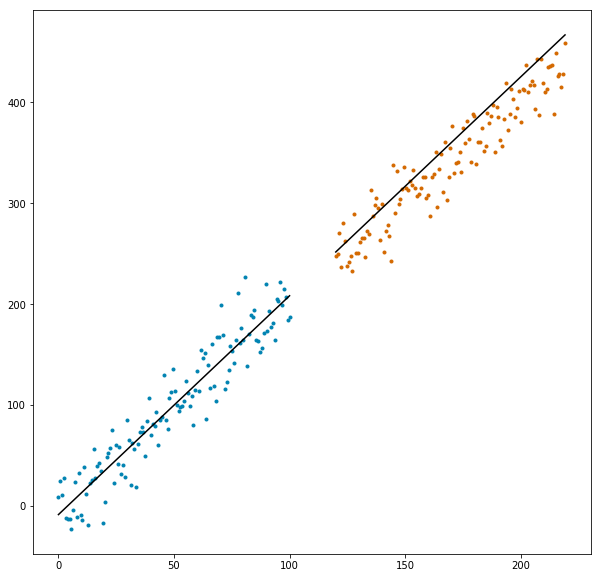

R2 Score 0.89648373092 
R2 Score 0.80680255065 


In [29]:
from sklearn.metrics import r2_score

dfPredictions = utils.predictDataset(0, 100, 0.8, reg)
dfPredictions2 = utils.predictDataset(120, 220, 0.8, reg)

#Predicting new data
df2 = utils.createDataset(120, 220, 0.8, dataSetFunction)  
features2 = df2["x"]
values2 = df2["y"]



fig, ax = plt.subplots(figsize=(10, 10))
#Trained Data
ax.scatter(features, values, color='#0083B2', marker='.') 
ax.plot(features ,dfPredictions[['y']], color='#000000')

dfPredictions2[['y']].head()

#New Data
ax.scatter(features2, values2, color='#D46900', marker='.')  
ax.plot(features2, dfPredictions2[['y']], color='#000000')


plt.show() 


print "R2 Score {} ".format(r2_score(values, dfPredictions))
print "R2 Score {} ".format(r2_score(values2, dfPredictions2))